In [39]:
# CLEANING SALARY

import pandas as pd
import matplotlib.pyplot as plt

all_salaries_df = []

#df = pd.read_csv('/content/RISE-Retention-Research/data/salaries/salaries_10_11.csv')
#display(df.head())

for i in range(10,21):
  src = '/content/RISE-Retention-Research/data/salaries/salaries_' + str(i) + '_' + str(i+1) +'.csv'
  salaries_df = pd.read_csv(src)
  salaries_df = salaries_df.drop(index=0)
  salaries_df.columns = ["District Name", "District Code", "Salary Totals", "Average Salary", "FTE Count"]
  salaries_df = salaries_df.drop(columns=["District Name", "FTE Count", "Salary Totals"])
  salaries_df["Year"] = 2001+i
  all_salaries_df.append(salaries_df)

combined_salaries_df = pd.concat(all_salaries_df, ignore_index=True)
combined_salaries_df["Average Salary"] = combined_salaries_df["Average Salary"].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
combined_salaries_df["Average Salary"] = pd.to_numeric(combined_salaries_df["Average Salary"])

filtered_salaries_df = combined_salaries_df[combined_salaries_df['District Code'] != '00000000']

# Inflation data (using 2010 as the base year)
inflation_rates = {
    2010: 1.0000, # Base year
    2011: 1.0164,
    2012: 1.0164 * 1.0316, # Cumulative inflation
    2013: 1.0164 * 1.0316 * 1.0207,
    2014: 1.0164 * 1.0316 * 1.0207 * 1.0146,
    2015: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162,
    2016: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012,
    2017: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126,
    2018: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213,
    2019: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249,
    2020: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176,
    2021: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123,
    2022: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123 * 1.0470,
}

# Calculate real average salary
combined_salaries_df['Real Average Salary'] = combined_salaries_df.apply(
    lambda row: row['Average Salary'] / inflation_rates.get(row['Year'], 1.0), axis=1
)


mask = combined_salaries_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_salaries_df.loc[mask, ['Year', 'Average Salary', 'Real Average Salary']].copy()


display(combined_salaries_df.head(5000))

,District Code,Average Salary,Year,Real Average Salary
0,00010000,73887,2011,72694.805195
1,00020000,75741,2011,74518.890201
2,06000000,72411,2011,71242.621015
3,00030000,57227,2011,56303.620622
4,06030000,65939,2011,64875.049193
...,...,...,...,...
3712,03470000,89168,2021,73923.232329
3713,03480000,93339,2021,77381.129804
3714,03490000,43543,2021,36098.592604
3715,03500000,87348,2021,72414.391906


In [40]:
#CLEANING CLASS SIZE

all_class_sizes_df = []

#df=pd.read_csv('/content/RISE-Retention-Research/data/class_size/size_10_11.csv')
#display(df.head())

for i in range(10,21):
  src = '/content/RISE-Retention-Research/data/class_size/size_' + str(i) + '_' + str(i+1) +'.csv'
  class_size_df = pd.read_csv(src)
  class_size_df = class_size_df.drop(index=0)
  class_size_df = class_size_df.drop(columns = ["Unnamed: 2", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])
  class_size_df.columns = ["District Name", "District Code", "Average Class Size"]
  class_size_df = class_size_df.drop(columns = ["District Name"])
  class_size_df["Year"] = 2001+i
  all_class_sizes_df.append(class_size_df)

combined_class_sizes_df = pd.concat(all_class_sizes_df, ignore_index=True)

mask = combined_class_sizes_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_class_sizes_df.loc[mask, ['Year', 'Average Class Size']].copy()

display(combined_class_sizes_df.head(5000))


,District Code,Average Class Size,Year
0,04450000,18.4,2011
1,00010000,25.7,2011
2,04120000,23.0,2011
3,00020000,23.1,2011
4,06000000,21.1,2011
...,...,...,...
4439,03470000,13.8,2021
4440,03480000,14.1,2021
4441,03490000,6.0,2021
4442,03500000,18.4,2021


In [41]:
#CLEANING EXPENDITURES

import pandas as pd
import matplotlib.pyplot as plt

all_per_pupil_df = []

#df=pd.read_csv('/content/RISE-Retention-Research/data/per_pupil/pupil_10.csv')
#display(df.head())

for i in range(11,22):
  src = '/content/RISE-Retention-Research/data/per_pupil/pupil_' + str(i) +'.csv'
  per_pupil_df = pd.read_csv(src)
  per_pupil_df = per_pupil_df.drop(columns = ["Unnamed: 8", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6",])
  per_pupil_df = per_pupil_df.drop(index=0)
  per_pupil_df.columns = ["District Name", "District Code", "Total Expenditures per Pupil"]
  per_pupil_df = per_pupil_df.drop(columns = ["District Name"])
  per_pupil_df["Year"] = 2000+i
  # Clean and convert to numeric here
  per_pupil_df["Total Expenditures per Pupil"] = per_pupil_df["Total Expenditures per Pupil"].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
  per_pupil_df["Total Expenditures per Pupil"] = pd.to_numeric(per_pupil_df["Total Expenditures per Pupil"], errors='coerce') # Use errors='coerce' to handle any remaining non-numeric values

  all_per_pupil_df.append(per_pupil_df)

combined_per_pupil_df = pd.concat(all_per_pupil_df, ignore_index=True)

# Inflation data (using 2010 as the base year)
inflation_rates = {
    2010: 1.0000, # Base year
    2011: 1.0164,
    2012: 1.0164 * 1.0316, # Cumulative inflation
    2013: 1.0164 * 1.0316 * 1.0207,
    2014: 1.0164 * 1.0316 * 1.0207 * 1.0146,
    2015: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162,
    2016: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012,
    2017: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126,
    2018: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213,
    2019: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249,
    2020: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176,
    2021: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123,
    2022: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123 * 1.0470,
}

# Calculate real expenditures per pupil
combined_per_pupil_df['Real Total Expenditures per Pupil'] = combined_per_pupil_df.apply(
    lambda row: row['Total Expenditures per Pupil'] / inflation_rates.get(row['Year'], 1.0), axis=1
)


mask = combined_per_pupil_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_per_pupil_df.loc[mask, ['Year', 'Total Expenditures per Pupil', 'Real Total Expenditures per Pupil']].copy()


display(combined_per_pupil_df.head(5000))

,District Code,Total Expenditures per Pupil,Year,Real Total Expenditures per Pupil
0,00010000,11415.14,2011,11230.952381
1,00020000,11480.23,2011,11294.992129
2,06000000,13181.82,2011,12969.126328
3,00030000,11454.39,2011,11269.569067
4,06030000,12017.11,2011,11823.209366
...,...,...,...,...
3958,03470000,20497.87,2021,16993.414748
3959,03480000,17315.90,2021,14355.455978
3960,03490000,14577.28,2021,12085.049078
3961,03500000,20107.03,2021,16669.395412


In [42]:
#CLEANING RETENTION


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_r_dfs = []


for i in range(12,23):
  src = '/content/RISE-Retention-Research/data/retention/retention_' + str(i) + '.csv'
  r_df = pd.read_csv(src)
  r_df = r_df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7"])
  r_df = r_df.drop(index=0)
  r_df.columns = ["District Name", "District Code", "Teacher Total", "Teacher # Retained", "Teacher % Retained"]
  r_df = r_df.drop(columns = ["Teacher Total", "Teacher # Retained"])
  r_df["Year"] = 1999+i
  all_r_dfs.append(r_df)


combined_r_df = pd.concat(all_r_dfs, ignore_index=True)
combined_r_df["District Name"] = combined_r_df["District Name"].str.lower()
combined_r_df["Teacher % Retained"] = pd.to_numeric(combined_r_df["Teacher % Retained"], errors='coerce')
combined_r_df = combined_r_df.dropna()

mask = combined_r_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_r_df.loc[mask, ['Year', 'Teacher % Retained']].copy()

state['Teacher % Retained'] = pd.to_numeric(state['Teacher % Retained'], errors='coerce')
state = (state.groupby('Year', as_index=False)['Teacher % Retained'].mean())

display(combined_r_df.head(5000))


,District Name,District Code,Teacher % Retained,Year
0,abby kelley foster charter public (district),04450000,73.9,2011
1,abington,00010000,88.1,2011
2,academy of the pacific rim charter public (dis...,04120000,70.3,2011
3,acton,00020000,94.6,2011
4,acton-boxborough,06000000,93.8,2011
...,...,...,...,...
4418,worcester,03480000,88.9,2021
4419,worthington,03490000,66.7,2021
4420,wrentham,03500000,94.7,2021
4421,state totals,00000000,86.8,2021


In [43]:
#COMBINED DF

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

dfs = [combined_r_df, combined_per_pupil_df, combined_salaries_df, combined_class_sizes_df]
merged_df = reduce(lambda left, right: pd.merge(left, right, on=["District Code", "Year"], how="inner"), dfs)

df_cleaned = merged_df.dropna().copy()

df_cleaned.loc[:, "Year"] = df_cleaned["Year"].astype(int)
df_cleaned["Teacher % Retained"] = pd.to_numeric(df_cleaned["Teacher % Retained"])
df_cleaned["Total Expenditures per Pupil"] = pd.to_numeric(df_cleaned["Total Expenditures per Pupil"])
df_cleaned["Real Total Expenditures per Pupil"] = pd.to_numeric(df_cleaned["Real Total Expenditures per Pupil"]) # Ensure this column is numeric
df_cleaned.loc[:, "Average Salary"] = df_cleaned["Average Salary"].astype(int)
df_cleaned["Real Average Salary"] = pd.to_numeric(df_cleaned["Real Average Salary"]) # Ensure this column is numeric
df_cleaned["Average Class Size"] = pd.to_numeric(df_cleaned["Average Class Size"])


display(df_cleaned.head(10000))

,District Name,District Code,Teacher % Retained,Year,Total Expenditures per Pupil,Real Total Expenditures per Pupil,Average Salary,Real Average Salary,Average Class Size
0,abington,00010000,88.1,2011,11415.14,11230.952381,73887,72694.805195,25.7
1,acton,00020000,94.6,2011,11480.23,11294.992129,75741,74518.890201,23.1
2,acton-boxborough,06000000,93.8,2011,13181.82,12969.126328,72411,71242.621015,21.1
3,acushnet,00030000,91.9,2011,11454.39,11269.569067,57227,56303.620622,18.7
4,adams-cheshire,06030000,95.5,2011,12017.11,11823.209366,65939,64875.049193,16.9
...,...,...,...,...,...,...,...,...,...
3694,worcester,03480000,88.9,2021,17315.90,14355.455978,93339,77381.129804,14.1
3695,worthington,03490000,66.7,2021,14577.28,12085.049078,43543,36098.592604,6.0
3696,wrentham,03500000,94.7,2021,20107.03,16669.395412,87348,72414.391906,18.4
3697,state totals,00000000,86.8,2021,19066.35,15806.637142,86118,71394.681071,15.5


In [44]:
#Variables
X = df_cleaned[['Real Total Expenditures per Pupil', 'Real Average Salary', 'Average Class Size']]
y = df_cleaned['Teacher % Retained']

In [45]:
#Import Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#Create Tree
from sklearn.tree import DecisionTreeRegressor

# Limit the depth of the tree to prevent overfitting
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [63]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error, r2_score

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 36.902075168581106
R-squared: 0.12247007925334408


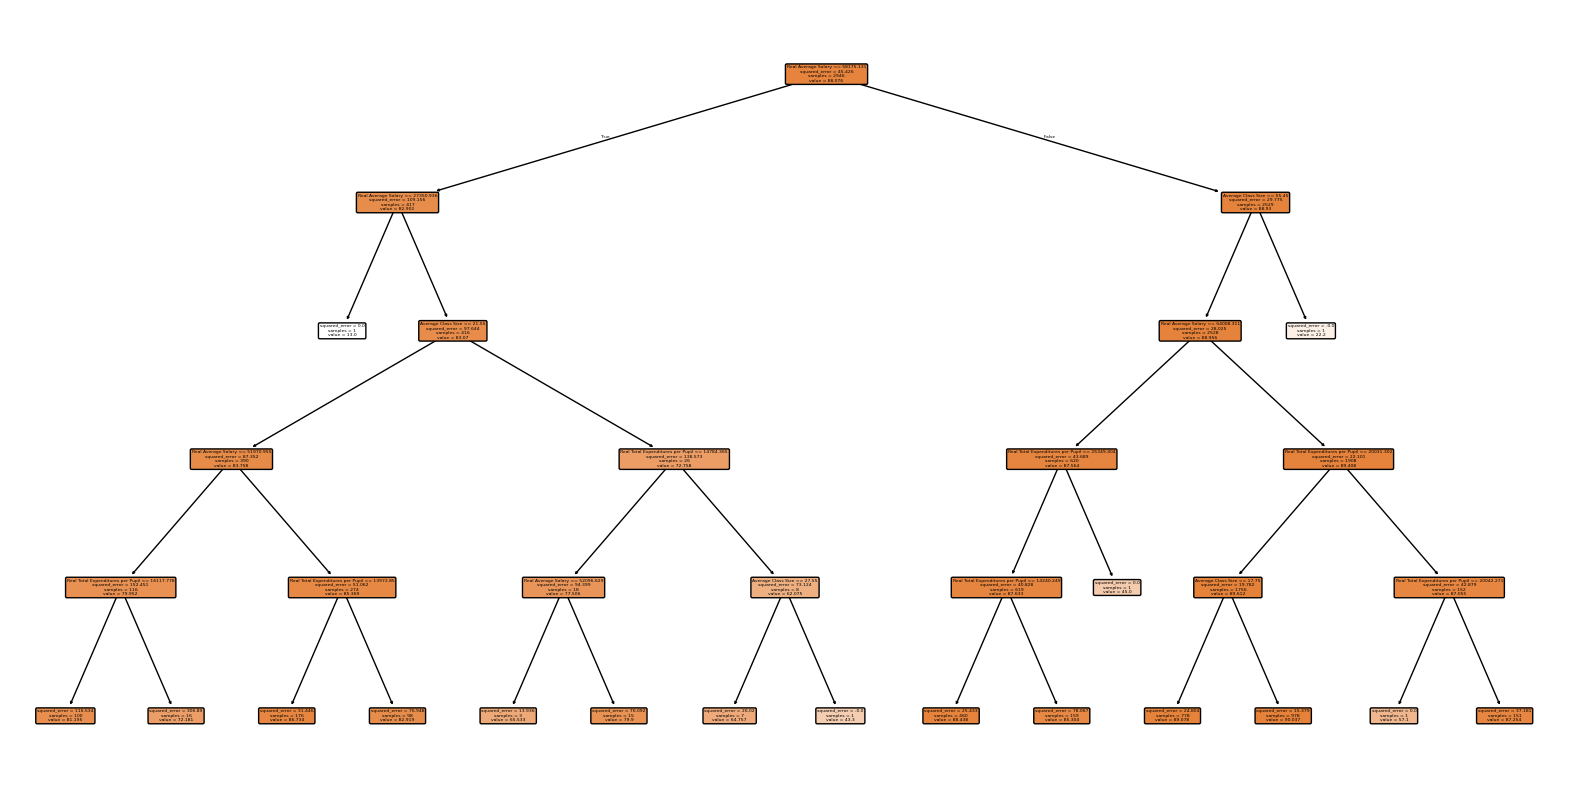

In [75]:
#Visualize tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_regressor.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True, node_ids=False, proportion=False)
plt.show()

In [50]:
best_dt_model = grid_search.best_estimator_

In [51]:
#Best Model
y_pred_best = best_dt_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

Best Model Mean Squared Error: 38.293687066580986
Best Model R-squared: 0.08937760212344903


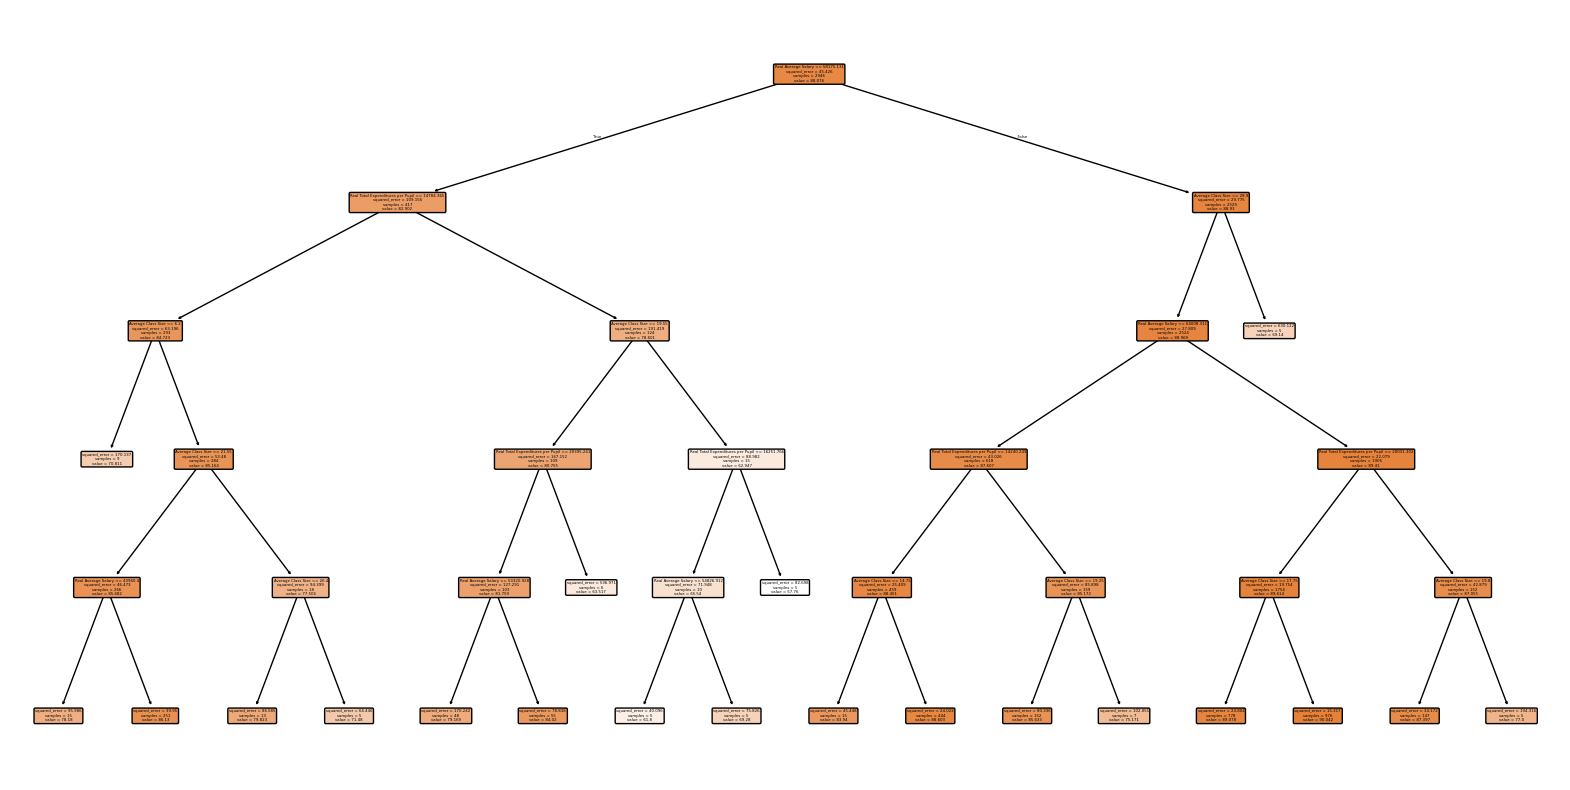

In [52]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns.tolist(), filled=True, rounded=True, node_ids=False, proportion=False)
plt.show()

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


X = df_cleaned[['Real Total Expenditures per Pupil', 'Real Average Salary', 'Average Class Size']]
y = df_cleaned['Teacher % Retained']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_regressor.fit(X_train, y_train)


y_pred = dt_regressor.predict(X_test)
print("Initial Model")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.3f}")


def prune_tree_labels(decision_tree, feature_names):
    tree_ = decision_tree.tree_
    node_labels = []
    for node in range(tree_.node_count):
        if tree_.children_left[node] != tree_.children_right[node]:
            feature = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            label = f"{feature} <= {threshold:.2f}"
        else:
            label = ""
        node_labels.append(label)
    return node_labels


param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

r2_scorer = make_scorer(r2_score)
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring=r2_scorer)
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_


y_pred_best = best_dt_model.predict(X_test)
print("\nBest Model")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_best):.3f}")

labels = prune_tree_labels(best_dt_model, X.columns.tolist())

plt.figure(figsize=(25, 15))
plot_tree(
    best_dt_model,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    proportion=False,
    impurity=False,
    precision=2,
    fontsize=14,
    node_ids=False,
    label='none'
)

ax = plt.gca()
for i, text_obj in enumerate(ax.texts):
    if i < len(labels):
        text_obj.set_text(labels[i])

plt.tight_layout()
plt.show()


NameError: name 'df_cleaned' is not defined

In [74]:
!pip install graphviz pydotplus
!apt-get install -y graphviz



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [82]:
display(correlation_matrix)

,Teacher % Retained,Real Total Expenditures per Pupil,Real Average Salary,Average Class Size
Teacher % Retained,1.000000,-0.095999,0.278626,-0.012249
Real Total Expenditures per Pupil,-0.095999,1.000000,0.333606,-0.449112
Real Average Salary,0.278626,0.333606,1.000000,0.080691
Average Class Size,-0.012249,-0.449112,0.080691,1.000000


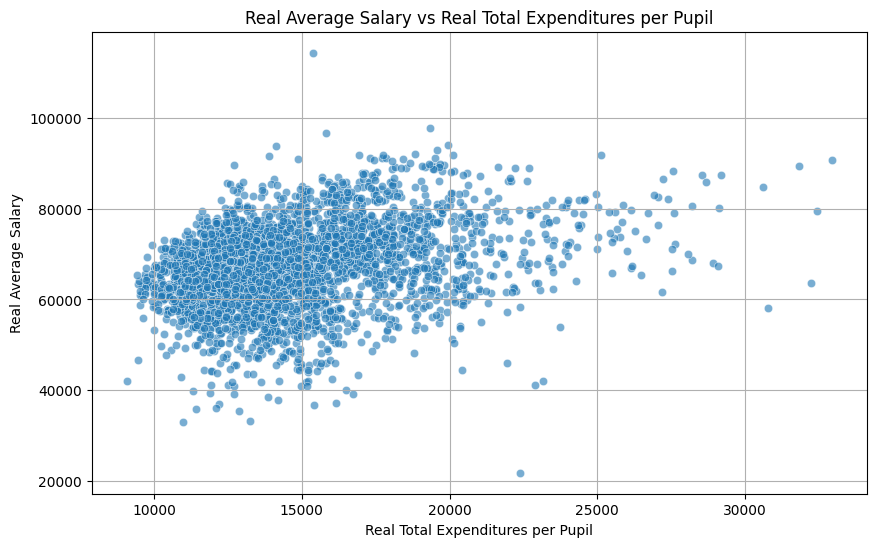

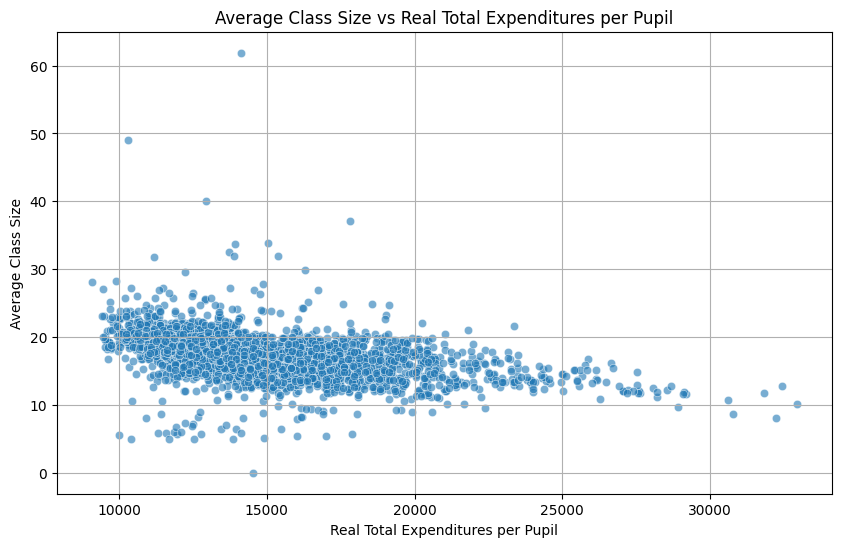

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Real Average Salary vs Real Total Expenditures per Pupil
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Real Average Salary', alpha=0.6)
plt.title('Real Average Salary vs Real Total Expenditures per Pupil')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Real Average Salary')
plt.grid(True)
plt.show()

# Scatter plot for Average Class Size vs Real Total Expenditures per Pupil
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Average Class Size', alpha=0.6)
plt.title('Average Class Size vs Real Total Expenditures per Pupil')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Average Class Size')
plt.grid(True)
plt.show()

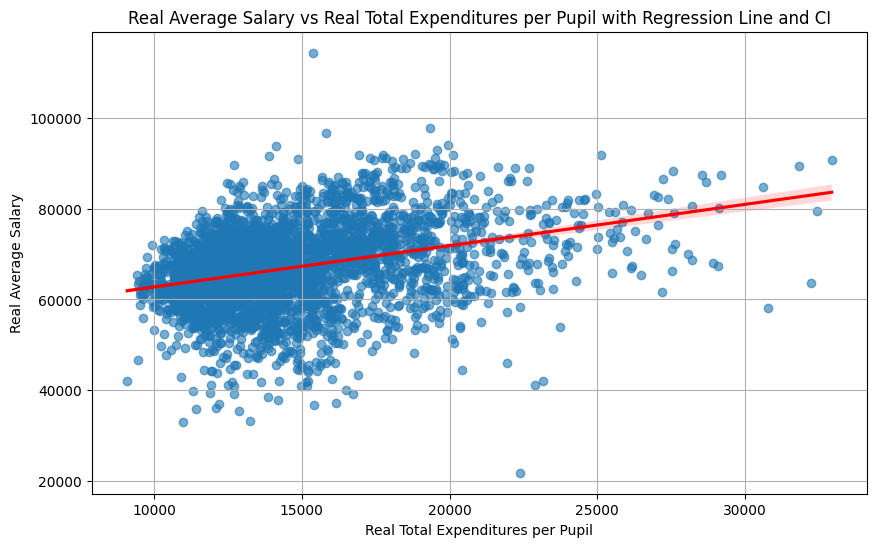

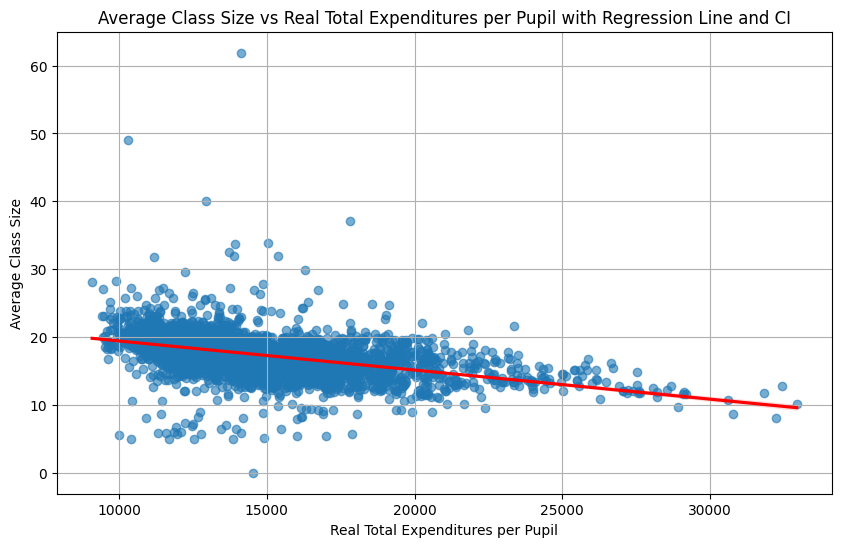

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Real Average Salary', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Real Average Salary vs Real Total Expenditures per Pupil with Regression Line and CI')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Real Average Salary')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Average Class Size', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Average Class Size vs Real Total Expenditures per Pupil with Regression Line and CI')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Average Class Size')
plt.grid(True)
plt.show()